In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import nltk
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud

In [2]:
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from bs4 import BeautifulSoup

#from gensim.models import Word2Vec
#from gensim.models import KeyedVectors
import pickle

In [3]:
sns.set_context('poster')


In [4]:
df=pd.read_excel('Ratings_prediction.xlsx', engine='openpyxl')

In [5]:
df.shape


(23175, 2)

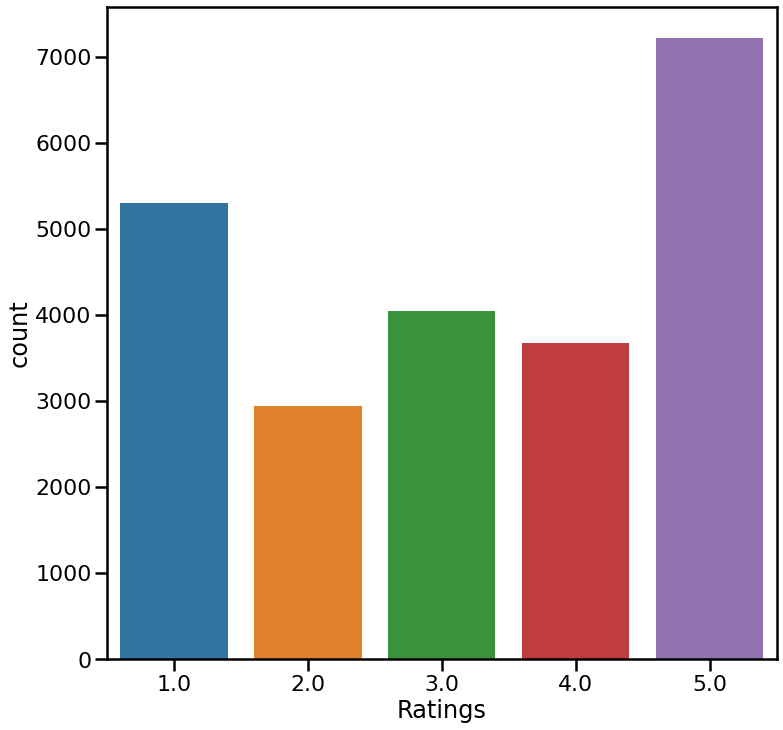

In [6]:
plt.figure(figsize=(12,12))
sns.countplot(x='Ratings',data=df)
plt.show()

In [7]:
minority_class_len = len(df[df['Ratings'] == 2.0])
minority_class_len

2936

In [8]:

score_1_class_indices = df[df['Ratings'] == 1.0].index
score_2_class_indices = df[df['Ratings'] == 2.0].index
score_3_class_indices = df[df['Ratings'] == 3.0].index
score_4_class_indices = df[df['Ratings'] == 4.0].index
score_5_class_indices = df[df['Ratings'] == 5.0].index

In [9]:
random_score_1_class_indices = np.random.choice(score_1_class_indices,minority_class_len,replace=False)
print(len(random_score_1_class_indices))
random_score_3_class_indices = np.random.choice(score_3_class_indices,minority_class_len,replace=False)
print(len(random_score_3_class_indices))
random_score_4_class_indices = np.random.choice(score_4_class_indices,minority_class_len,replace=False)
print(len(random_score_4_class_indices))
random_score_5_class_indices = np.random.choice(score_5_class_indices,minority_class_len,replace=False)
print(len(random_score_5_class_indices))

2936
2936
2936
2936


In [10]:
under_sample_indices = np.concatenate([random_score_1_class_indices,score_2_class_indices,random_score_3_class_indices,random_score_4_class_indices,random_score_5_class_indices])

In [11]:
df = df.loc[under_sample_indices]


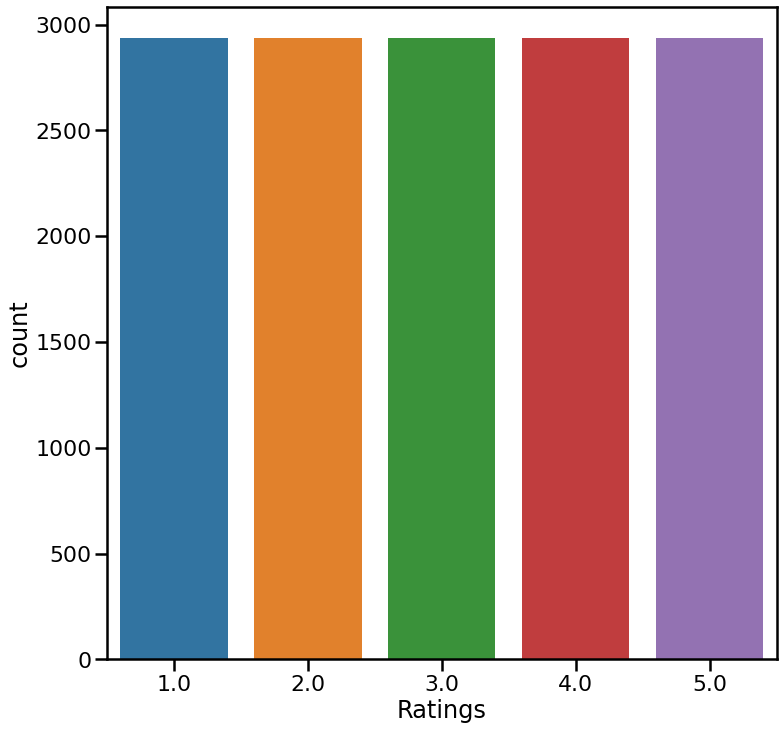

In [12]:
plt.figure(figsize=(12,12))
sns.countplot(x='Ratings',data=df)
plt.show()

In [13]:
df.shape

(14680, 2)

In [14]:
df.describe()

,Ratings
count,14680.000000
mean,3.000000
std,1.414262
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [15]:
nltk.download('stopwords')

sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(df['Review'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
 
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in sw)
    preprocessed_reviews.append(sentance.strip())

100%|██████████████████████████████████████████████████████████████████████████| 14680/14680 [00:07<00:00, 2005.46it/s]


In [17]:
stop_words = stopwords.words("english")

flat_list_review_summaries_no_stop = [word for word in preprocessed_reviews if word not in stop_words]

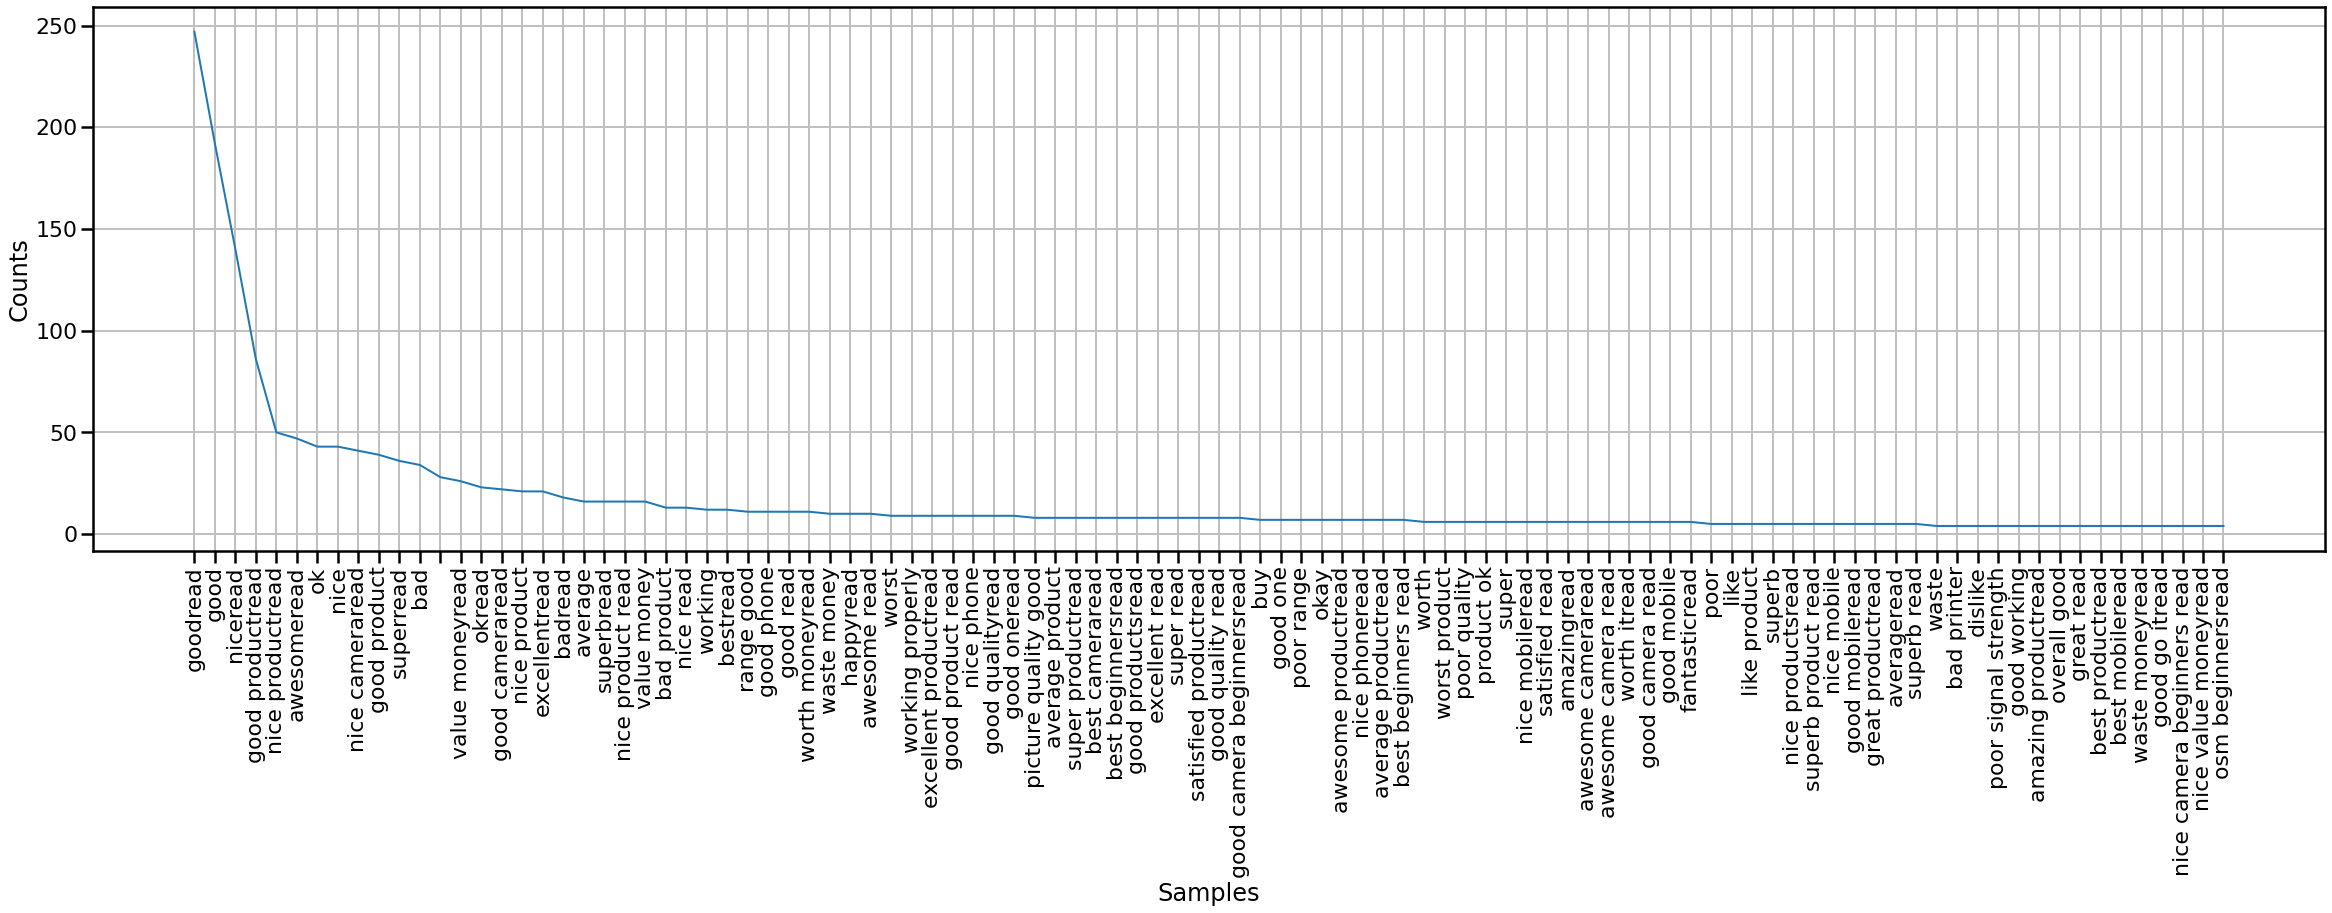

In [18]:
plt.figure(figsize=(40,10))
plt.xticks(rotation=45)
FreqDist(preprocessed_reviews).plot(100)
plt.show()


# Removing Unmeaningful Words 1st Attemp

In [19]:
for word in ['phone','camera','battery','mobile','days','charging','amazon','screen','day','gb','device','oneplus','mi','u','also']:
    stop_words.append(word)

In [20]:
flat_list_review_summaries_no_stop_2 =  [word for word in flat_list_review_summaries_no_stop if word not in stop_words]


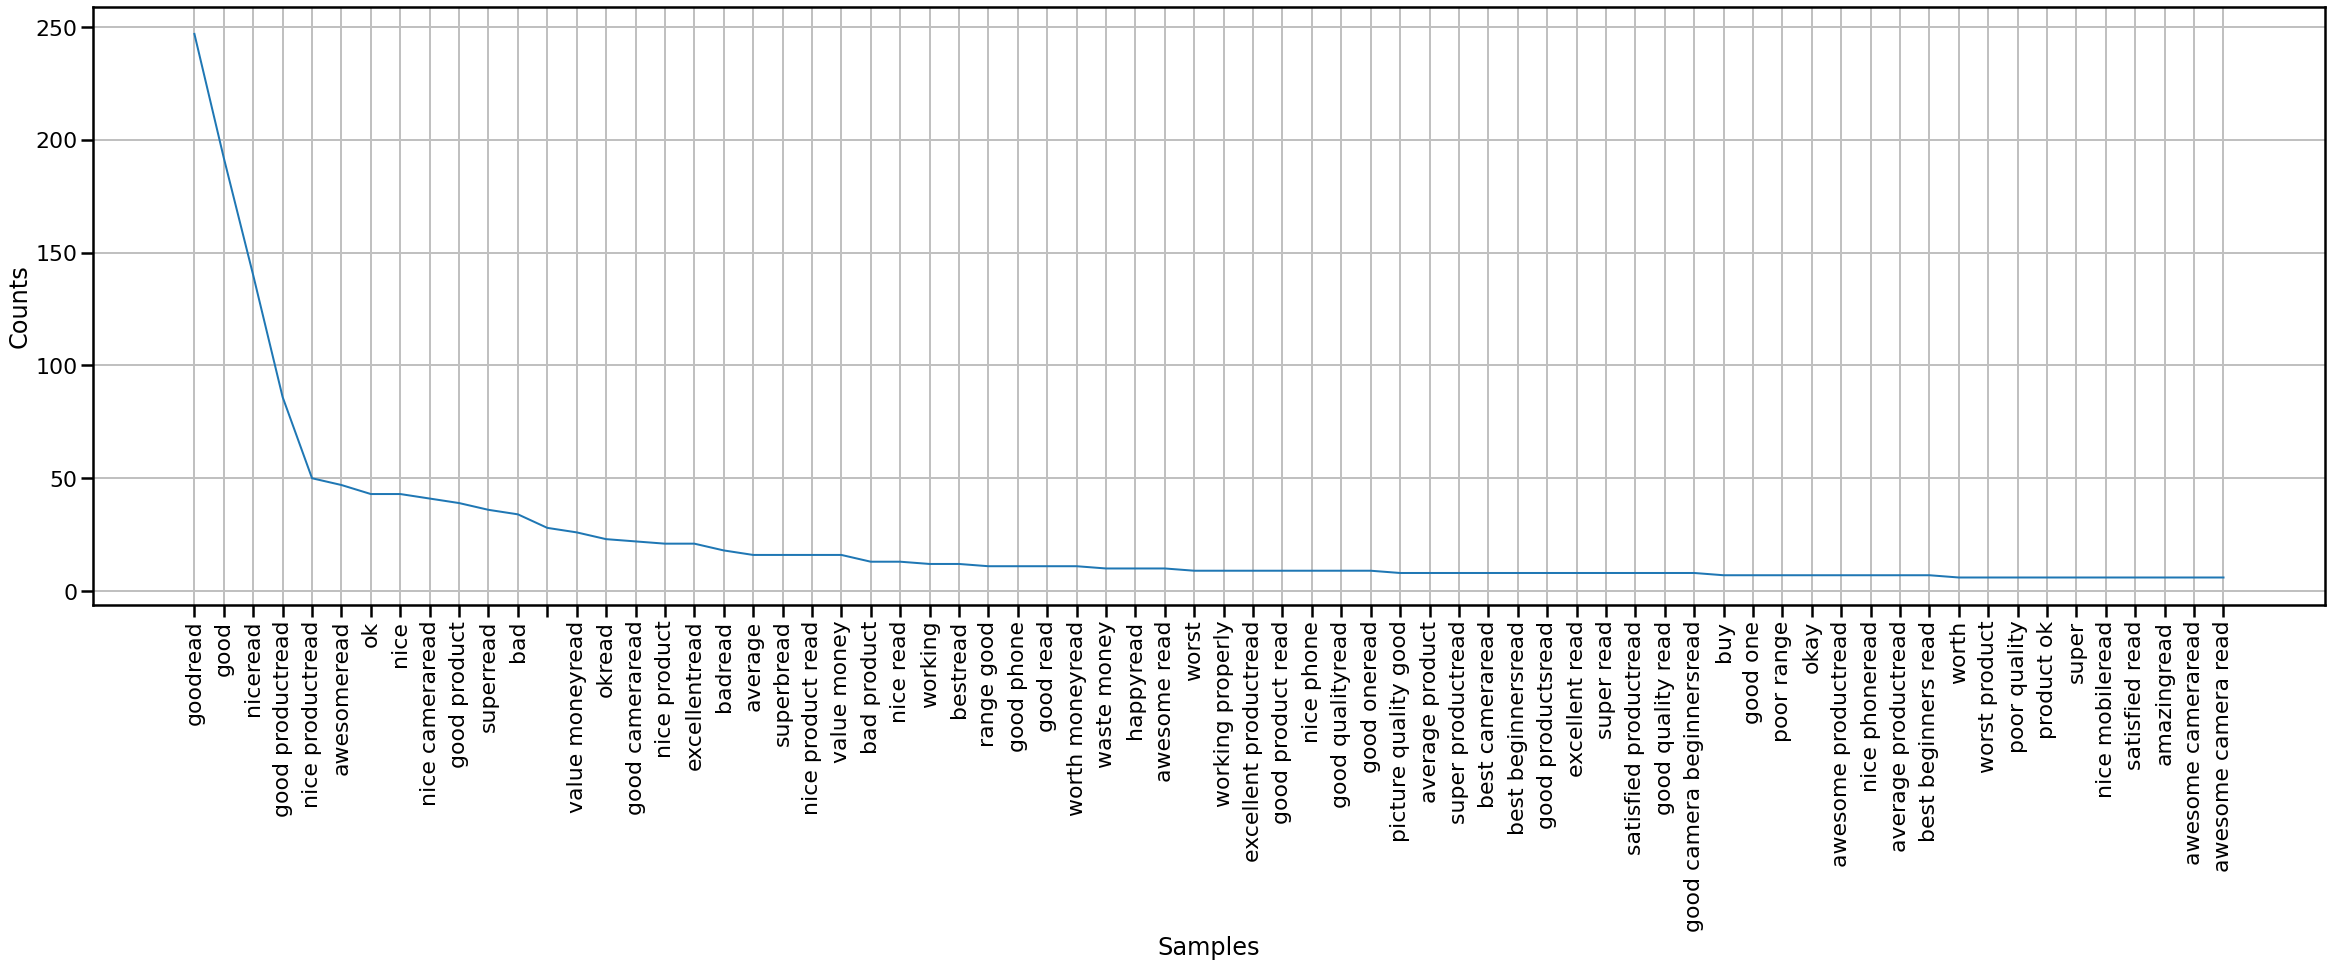

In [21]:
plt.figure(figsize=(40,11))
FreqDist(flat_list_review_summaries_no_stop_2).plot(70)
plt.show()

In [23]:
for word in ['sound','display','bass','tv','mp','hours','would','mah','month','router','read']:
    stop_words.append(word)

In [24]:
flat_list_review_summaries_no_stop_3 =  [word for word in flat_list_review_summaries_no_stop_2 if word not in stop_words]


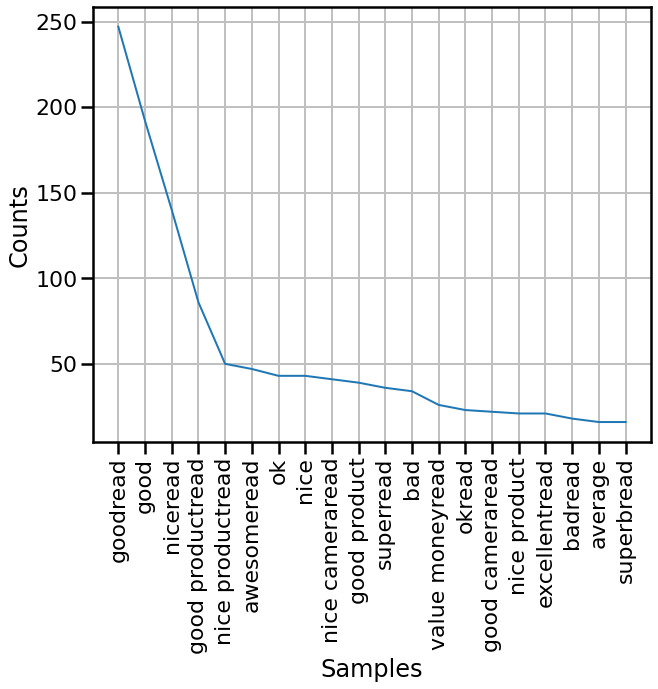

In [25]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_review_summaries_no_stop_3).plot(20)
plt.show()

In [26]:
flat_clean_sum_str = " ".join(flat_list_review_summaries_no_stop_3)


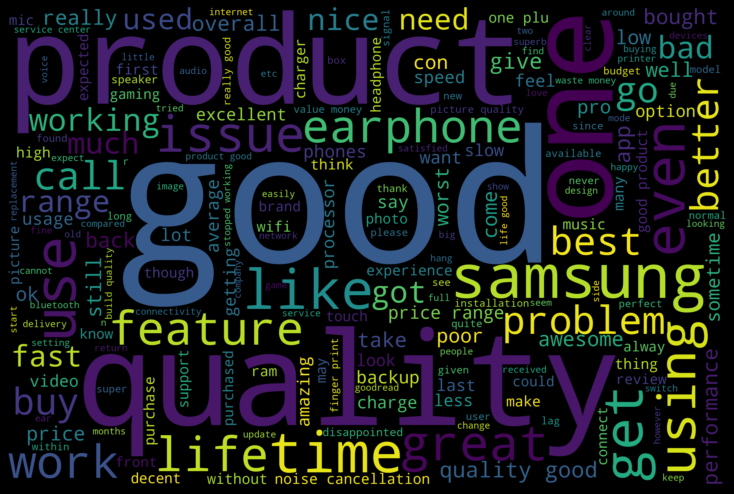

In [27]:
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      background_color = 'black',
                      stopwords = stop_words)

wordcloud.generate(flat_clean_sum_str)

plt.figure(figsize = (10,10),
           facecolor = 'k',
           edgecolor = 'k')

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
flat_review = " ".join(df['Review'].values)


# Stemming and Lemming

In [33]:
stemmer = PorterStemmer()
lemmy = WordNetLemmatizer()

In [34]:
def apply_stem(doc):
    
    doc_split = doc.split(' ')
    stem_doc = ''
    for word in doc_split:
        stem_doc += stemmer.stem(word) + ' '
        
    return stem_doc



def apply_lem(doc):
    
    doc_split = doc.split(' ')
    lem_v_doc = ''
    for word in doc_split:
        lem_v_doc += lemmy.lemmatize(word, pos='v') + ' '
        
    doc_split = lem_v_doc.split(' ')
    lem_doc = ''
    for word in doc_split:
        lem_doc += lemmy.lemmatize(word, pos='a') + ' '
        
    return lem_doc

In [35]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [43]:
df1['review_stemmed'] = df1['Review'].apply(apply_stem)
df1['review_lemmed'] = df1['Review'].apply(apply_lem)

In [44]:
review_index_to_check = 1100

print("ORIGINAL REVIEW:",'\n',df['Review'].iloc[review_index_to_check],'\n')
print("STEMMED REIVEW:",'\n',df['review_stemmed'].iloc[review_index_to_check],'\n')
print("LEMMED REVIEW:",'\n',df['review_lemmed'].iloc[review_index_to_check],'\n')


ORIGINAL REVIEW: 
 I bought the product last month but now Mic Is not working, now it's really hard to use. While traveling i should keep the mobile near to me when making call. Not satisfied with call setup. 

STEMMED REIVEW: 
 i bought the product last month but now mic is not working, now it' realli hard to use. while travel i should keep the mobil near to me when make call. not satisfi with call setup.  

LEMMED REVIEW: 
 I buy the product last month but now Mic Is not working, now it's really hard to use. While travel i should keep the mobile near to me when make call. Not satisfy with call setup.   



In [28]:
data = {'Review': df['Review'],
        'Ratings': df['Ratings'],
        'final_rev': preprocessed_reviews}

In [29]:
df1 = pd.DataFrame(data)


In [32]:
df1['Review']

6029     Battery life very poor. Camera average. No rea...
17890                                     Not working ....
17584                                       Waste of money
9797     Received the product today. The never settle l...
9265     I got this earphones today morning and it show...
                               ...                        
16669               Good Product I Am Loving It 😊READ MORE
125                                            Thanks oppo
2542     The camera quality is absolutely amazing to cl...
2424     What I really like about this phone is Battery...
13873          Highly Satisfied. Highly recommendREAD MORE
Name: Review, Length: 14680, dtype: object

In [46]:
x_train, x_test, y_train, y_test = train_test_split(df1.drop(columns=['Ratings']), 
                                                    df1['Ratings'], 
                                                    test_size=.2, 
                                                    random_state=42)

In [105]:
x = df1.drop(columns=['Ratings'])
y = df1['Ratings']

In [47]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(11744, 4)
(2936, 4)
(11744,)
(2936,)


In [48]:

y_train_df = pd.DataFrame(y_train).reset_index(drop=True)
y_test_df = pd.DataFrame(y_test).reset_index(drop=True)
y_train_df.head()

,Ratings
0,3.0
1,3.0
2,2.0
3,4.0
4,4.0


# TF-IDF Vectorisation for Reviews

In [49]:
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

tf_idf_vect = TfidfVectorizer(lowercase=True,
                              tokenizer = tokenizer.tokenize, 
                              stop_words=stop_words, 
                              ngram_range=(1,2),
                              min_df = 0.05)
 
x_lemm_train_tfidf_sparse = tf_idf_vect.fit_transform(x_train['review_lemmed'])

x_lemm_test_tfidf_sparse = tf_idf_vect.transform(x_test['review_lemmed'])


x_lemm_train_tfidf = pd.DataFrame(x_lemm_train_tfidf_sparse.toarray(), 
                                  columns=tf_idf_vect.get_feature_names())

x_lemm_test_tfidf = pd.DataFrame(x_lemm_test_tfidf_sparse.toarray(), 
                                  columns=tf_idf_vect.get_feature_names())


x_lemm_train_tfidf.head()


,bad,best,buy,call,charge,even,fast,get,give,go,...,problem,product,quality,range,really,samsung,take,time,use,work
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0.0,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.522598,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.464569,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.36173,0.229284,0.0,...,0.0,0.000000,0.314045,0.0,0.711369,0.0,0.0,0.0,0.165094,0.0


In [51]:
x_lemm_summary_train_text = x_lemm_train_tfidf
x_lemm_summary_test_text = x_lemm_test_tfidf
x_lemm_summary_train_text.head()

,bad,best,buy,call,charge,even,fast,get,give,go,...,problem,product,quality,range,really,samsung,take,time,use,work
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0.0,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.522598,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.464569,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.36173,0.229284,0.0,...,0.0,0.000000,0.314045,0.0,0.711369,0.0,0.0,0.0,0.165094,0.0


In [52]:
print(x_lemm_summary_train_text.shape)
print(x_lemm_summary_test_text.shape)
print(y_train.shape)
print(y_test.shape)

(11744, 33)
(2936, 33)
(11744,)
(2936,)


In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold

import pickle



In [81]:
x_train = x_lemm_summary_train_text
y_train = y_train_df

In [82]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train['Ratings'],test_size=.25,random_state=42)


In [83]:
skf = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)


In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier 

In [86]:
import ensemble

In [96]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve


In [97]:
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_lemm_summary_test_text)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*************************************************************************')
    print('\n')

Accuracy score of RandomForestClassifier() is:
0.364441416893733
[[300 132  34  22 115]
 [181 154  95  53 116]
 [109 114 103  89 156]
 [ 43  42  65 178 263]
 [ 49  26  40 122 335]]
              precision    recall  f1-score   support

         1.0       0.44      0.50      0.47       603
         2.0       0.33      0.26      0.29       599
         3.0       0.31      0.18      0.23       571
         4.0       0.38      0.30      0.34       591
         5.0       0.34      0.59      0.43       572

    accuracy                           0.36      2936
   macro avg       0.36      0.36      0.35      2936
weighted avg       0.36      0.36      0.35      2936

*************************************************************************


Accuracy score of AdaBoostClassifier() is:
0.37772479564032696
[[372  66  16  24 125]
 [226 113  71  54 135]
 [126  82  91 107 165]
 [ 51  42  35 185 278]
 [ 46  23  36 119 348]]
              precision    recall  f1-score   support

         1.0       0

In [99]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [100]:
#Get the accuracy on the training data
forest.score(x_train, y_train)

0.682788374205268

In [101]:
#Show the confusion matrix and accuracy for  the model on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, forest.predict(x_lemm_summary_test_text))
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print(cm)
print('Model Testing Accuracy = "{}!"'.format(  (TP + TN) / (TP + TN + FN + FP)))
print()# Print a new line

[[292 126  41  23 121]
 [183 165  83  39 129]
 [118 102 104  80 167]
 [ 57  40  65 155 274]
 [ 49  27  43 112 341]]
Model Testing Accuracy = "0.5966057441253264!"



In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from yellowbrick.model_selection import feature_importances

#===============================================================================================#

# Classification Models Class

#===============================================================================================#

class Classification():
    
    """
    This class is for performing classifcation algorithms such as Logistic Regression, Decision Tree, Random Forest, and SVM.
    
    Parameters
    ----------
    model_type: 'Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM'
    the type of classifcation algorithm you would like to apply 
    
    x_train: dataframe
    the independant variables of the training data
    
    x_val: dataframe
    the independant variables of the validation data
    
    y_train: series
    the target variable of the training data
    
    y_val: series
    the target variable of the validation data
    
    """
    
    def __init__(self,model_type,x_train,x_val,y_train,y_val):

        self.model_type = model_type
        self.x_train = x_train
        self.y_train = y_train
        self.x_val = x_val
        self.y_val = y_val
        self.scores_table = pd.DataFrame()
        self.feature_importances = pd.DataFrame()
        self.name = self
        
        if self.model_type == 'Logistic Regression':
            self.technique = LogisticRegression(fit_intercept=False)
        elif self.model_type == 'Decision Tree':
            self.technique = DecisionTreeClassifier(random_state=42)
        elif self.model_type == 'Random Forest':
            self.technique = RandomForestClassifier(n_estimators=20,n_jobs=-1,random_state=42)
        elif self.model_type == 'SVM':
            self.technique = SVC()
        elif self.model_type == 'Naive Bayes':
            self.technique = GaussianNB()
        elif self.model_type == 'KNN':
            self.technique = KNeighborsClassifier(n_jobs=-1)
            
#===============================================================================================#

# Score Function

#===============================================================================================#

    def scores(self,model,x_train,x_val,y_train,y_val):
        
        """
        Gets the accuracy for the given data and creates a dataframe containing scores.
        Parameters
        ----------
        model: 'Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM'
        the type of classifcation applied
        x_train: dataframe
        the independant variables of the training data
        x_val: dataframe
        the independant variables of the validation data
        y_train: series
        the target variable of the training data
        y_val: series
        the target variable of the validation data
        
        Returns
        ----------
        scores_table: a dataframe with the model used, the train accuracy and validation accuracy
        """
        
        self.acc_train = self.best_model.score(x_train,y_train)
        self.acc_val = self.best_model.score(x_val,y_val)
        
        d = {'Model Name': [self.model_type],
             'Train Accuracy': [self.acc_train], 
             'Validation Accuracy': [self.acc_val],
             'Accuracy Difference':[self.acc_train-self.acc_val]}
        self.scores_table = pd.DataFrame(data=d)
        
        return self.scores_table


#===============================================================================================#

# Get Scores Function

#===============================================================================================#

    def get_scores(self,params,cv_type):
        
        """
        Performs a gridsearch cross validation with given hyperparameters and data.
        Gets the accuracy for the given data and creates a dataframe containing scores.
        Parameters
        ----------
        param_grid: dictionary 
        specified hyperparameters for chosen classification algorithm to be passed through gridsearch cross validation
        
        cv_type: 'skf'
        the type of cross validation split to be used for gridsearch
        """
        
        classifier = self.technique
        fit_classifier = classifier.fit(self.x_train,self.y_train)
        opt_model = GridSearchCV(fit_classifier,
                                 params,
                                 cv=cv_type,
                                 scoring='accuracy',
                                 return_train_score=True,
                                 n_jobs=-1)
        self.opt_model = opt_model.fit(self.x_train,self.y_train) 
        self.best_model = opt_model.best_estimator_
        self.scores = Classification.scores(self,self.best_model,self.x_train,self.x_val,self.y_train,self.y_val)
        self.best_params = opt_model.best_params_
        display(self.scores_table)
        if params == {}:
            pass
        else:
            print("The best hyperparameters are: ", self.best_params,'\n')
        self.y_validated = self.best_model.predict(self.x_val)
        self.classification_report = pd.DataFrame.from_dict(classification_report(self.y_val,self.y_validated,output_dict=True)).iloc[0:3,0:5]
        return self.classification_report

#===============================================================================================#

# Feature Importance Function

#===============================================================================================#
   
    def get_feature_importances(self):
        
        """
        Create a confusion matrix.
        Returns
        ----------
        feature_importances_bar : a bar chart with feature importance of given model
        """
        if (self.model_type == 'Decision Tree') or (self.model_type == 'Random Forest') or (self.model_type == 'SVM'):    
            self.feature_importances_table = pd.DataFrame(self.best_model.feature_importances_,
                                                    index = self.x_train.columns,
                                                    columns=['Importance']).sort_values('Importance',ascending =False)
            plt.figure(figsize=(9,7.5))
            self.feature_importances_bar = sns.barplot(y= self.feature_importances_table.index[:15], x= self.feature_importances_table['Importance'][:15])
            plt.show()
            return self.feature_importances_bar
        
        else:
            return print('This classification method does not have the attribute feature importance.')

#===============================================================================================#

# Confusion Matrix Function

#===============================================================================================#

    def conf_matrix(self):
        
        """
        Create a confusion matrix.
        
        Returns
        ----------
        scores_table: a confusion matrix
        """
        
        plt.figure(figsize=(9,9))
        ax = sns.heatmap(confusion_matrix(self.y_val, self.y_validated),
                         annot= True, 
                         fmt = '.4g', 
                         cbar=0,
                         xticklabels=[1,2,3,4,5],
                         yticklabels=[1,2,3,4,5])
        ax.set(xlabel='Predicted', ylabel='True')
        plt.show()



#===============================================================================================#

# Test Score Function

#===============================================================================================#

    def get_test_scores(self,X_test,y_test):
        
        """
        Gets a ROC AUC score for given data and creates a dataframe containing scores.
        Creates a ROC plot.
        
        Parameters
        ----------
        x_test: dataframe 
        independant variables of the test data
        
        y_test: dataframe 
        target variable of the test data
        """
            
        self.y_test = y_test
        self.x_test = X_test
        self.scores_table = pd.DataFrame()
        self.test_scores = Classification.scores(self,self.best_model,self.x_train,self.x_test,self.y_train,self.y_test)
        display(self.scores_table)
        self.y_tested = self.best_model.predict(self.x_test)
        self.test_classification_report = pd.DataFrame.from_dict(classification_report(self.y_test,self.y_tested,output_dict=True)).iloc[0:3,0:5]
        
        return self.test_classification_report
    
#===============================================================================================#

# Show Test Confusion Matrix Function

#===============================================================================================#

    def test_conf_matrix(self):
        
        """
        Create a confusion matrix for the test data.
        
        Returns
        ----------
        scores_table: a confusion matrix
        """
        plt.figure(figsize=(9,9))
        ax = sns.heatmap(confusion_matrix(self.y_test, self.y_tested),
                         annot= True, 
                         fmt = '.4g', 
                         cbar=0,
                         xticklabels=[1,2,3,4,5],
                         yticklabels=[1,2,3,4,5])
        ax.set(xlabel='Predicted', ylabel='True')
        plt.show()

# Decision Tree classification

In [130]:
dec_tree_1 = Classification('Decision Tree',x_train,x_val,y_train,y_val)


In [131]:
dec_tree_1.get_scores(params,skf)


,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Decision Tree,0.363987,0.331403,0.032584


The best hyperparameters are:  {'max_depth': 9, 'min_samples_leaf': 50} 



,1.0,2.0,3.0,4.0,5.0
precision,0.517500,0.356913,0.375465,0.300341,0.275912
recall,0.356282,0.189420,0.163430,0.311504,0.645051
f1-score,0.422018,0.247492,0.227734,0.305821,0.386503


# Random Forest

In [132]:
params = {'min_samples_leaf':[3,5,10,15,30,50,100],
          'max_depth':[3,5,7,9,11,13,15]}

In [133]:
ran_for_1 = Classification('Random Forest',x_train,x_val,y_train,y_val)


In [134]:
ran_for_1.get_scores(params,skf)


,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Random Forest,0.464918,0.375341,0.089578


The best hyperparameters are:  {'max_depth': 13, 'min_samples_leaf': 10} 



,1.0,2.0,3.0,4.0,5.0
precision,0.435862,0.350543,0.414815,0.358566,0.340803
recall,0.543890,0.220137,0.181230,0.318584,0.622867
f1-score,0.483920,0.270440,0.252252,0.337395,0.440555


In [ ]:
params = {'min_samples_leaf':[7,8,9,10,11,12,13,14],
          'max_depth':[17,18,19,20,21,22]}

In [135]:
ran_for_3 = Classification('Random Forest',x_train,x_val,y_train,y_val)


In [136]:
ran_for_3.get_scores(params,skf)


,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Random Forest,0.464918,0.375341,0.089578


The best hyperparameters are:  {'max_depth': 13, 'min_samples_leaf': 10} 



,1.0,2.0,3.0,4.0,5.0
precision,0.435862,0.350543,0.414815,0.358566,0.340803
recall,0.543890,0.220137,0.181230,0.318584,0.622867
f1-score,0.483920,0.270440,0.252252,0.337395,0.440555


# Support Vector 

In [137]:
params = {'kernel':['poly'],
          'degree':[2,3]}

In [138]:
svm_1 = Classification('SVM',x_train,x_val,y_train,y_val)


In [139]:
svm_1.get_scores(params,skf)


,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,SVM,0.468324,0.390327,0.077997


The best hyperparameters are:  {'degree': 2, 'kernel': 'poly'} 



,1.0,2.0,3.0,4.0,5.0
precision,0.440922,0.356725,0.400651,0.388471,0.370479
recall,0.526678,0.312287,0.199029,0.274336,0.646758
f1-score,0.480000,0.333030,0.265946,0.321577,0.471100


# KNN

In [141]:
params = {'n_neighbors':[5,10,50,100,200,300]}


ERROR! Session/line number was not unique in database. History logging moved to new session 66


In [142]:
knn_1 = Classification('KNN',x_train,x_val,y_train,y_val)


In [143]:
knn_1.get_scores(params,skf)


,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,KNN,0.393392,0.368188,0.025204


The best hyperparameters are:  {'n_neighbors': 100} 



,1.0,2.0,3.0,4.0,5.0
precision,0.408333,0.346561,0.397476,0.316901,0.361345
recall,0.590361,0.223549,0.203883,0.318584,0.513652
f1-score,0.482759,0.271784,0.269519,0.317741,0.424242
